In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt



df=pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")
df.head()


In [3]:
df=pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Step 1 : Uderstanding of data 

### checking top 10 rows of dataset

In [4]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


### checking shape of tha data

In [5]:
df.shape

(119390, 32)

 ### number of rows : 119390
 ### number of columns : 32

###  Checking The Data types  OF The Columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### this dataset contain 4 columns  of float type ,16 columns of int type and 12 columns of object type and tha memory usage is 29.1+mb

## viewing column names

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Checking unique value in each column.

In [8]:
df_unique=df.apply(lambda col: col.unique())
df_unique

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

### Checking statistical  detail of columns

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


## Step 2: Cleaning of Data

### handling missing values

### checking misssing and null values

In [10]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

#### From above output: there are 4  columns which having missing values.
#### company:  contains 82137 missing values
#### agent :   contains 12193 missing values
#### country : contains  452  missing values
#### children: contains  4   missing values

## checking missing  values % wheater they are relevant or irrelevant for analysis.

In [11]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

#### company:  contains 94.306 % missing values
#### agent :   contains 13.686% missing values
#### country : contains  0.408% missing values
#### children: contains  0.0033% missing values

#### Tha company column contains 94% of missing values so drop this column as it irelevant for analysis

In [12]:
df.drop("company",axis=1,inplace=True)

In [13]:
len(df.columns)

31

#### columns campany has been droped 

### filling tha missing values in agent column

In [14]:
df["agent"].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [15]:
df["agent"]=df["agent"].fillna(df["agent"].median)

#### missing values of agent filled by median 

 ### filling tha missing values in  country column

In [16]:
df["country"]=df["country"].fillna(df["country"].mode()[0])

#### missing values of country filled by mode

 ## filling tha missing values in  children column

In [17]:
df["children"]=df["children"].fillna(df["children"].median())

#### missing values of children filled by median 

In [18]:
df.isnull().sum().sum()

0

### Tha above output 0 which shows that tha data is free from missing values.

## total stay in night

In [19]:
df["total_stay_in_nights"]=df["stays_in_week_nights"]+df["stays_in_weekend_nights"]
df["total_stay_in_nights"]

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: total_stay_in_nights, Length: 119390, dtype: int64

## Step 3: insight from dataset

### Checking how many different hotel and costumer types  are there 

In [20]:
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [21]:
df["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

## Which agent made most of booking ?

 ## 1: Which meal type is most preffered meal of customers?

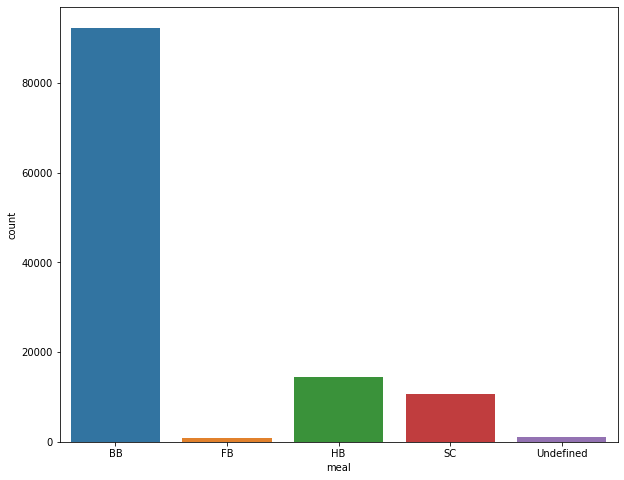

In [22]:
plt.figure( figsize=(10, 8))
sns.countplot(x = df["meal"])
plt.show()

### Most preferred meal type is BB (Bed and breakfast).

## 2: which hotel seems to make more revenue?

In [23]:
df.groupby(["hotel"])["adr"].agg(["max","min","mean"])

,max,min,mean
hotel,,,
City Hotel,5400.0,0.00,105.304465
Resort Hotel,508.0,-6.38,94.952930


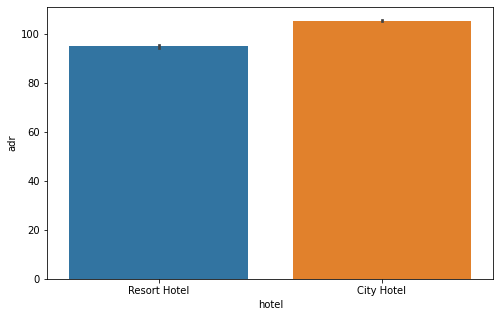

In [24]:
plt.figure(figsize = (8,5))
sns.barplot(x=df["hotel"], y=df["adr"])
plt.show()

 ###  Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

## 3:  Which hotel has higher lead time?

In [25]:
df.groupby(["hotel"])["lead_time"].median().reset_index()

,hotel,lead_time
0,City Hotel,74.0
1,Resort Hotel,57.0


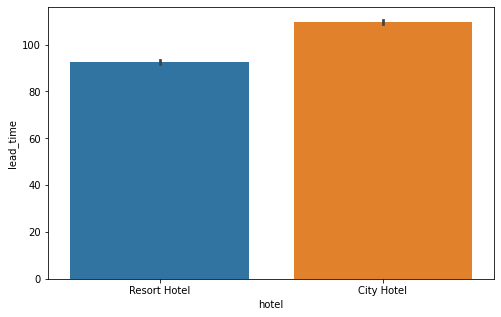

In [26]:
plt.figure(figsize = (8,5))
sns.barplot(x=df["hotel"], y=df["lead_time"])
plt.show()

### City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.

## 4: Which hotel has longer waiting time?

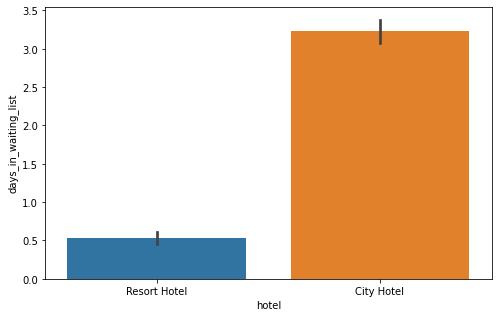

In [27]:
df.groupby(["hotel"])["days_in_waiting_list"].mean()
plt.figure(figsize = (8,5))
sns.barplot(x = df["hotel"], y = df["days_in_waiting_list"] )
plt.show()

### City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.



## 5: From where the most guests are coming ?

In [28]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


### Most guest are from Portugal and other Europian contries.

## 6: which type of costumers arived most

In [29]:
df["customer_type"].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

<AxesSubplot:xlabel='customer_type', ylabel='count'>

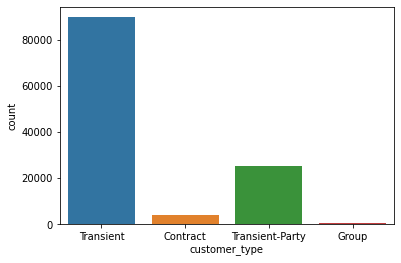

In [30]:
sns.countplot(x=df["customer_type"],data=df)

#### Most Of The Customers Were Transient type.

## 7: Mamimum cotumers arrival in which year (most of booking done)

In [31]:
df["arrival_date_year"].value_counts(normalize=True)

2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

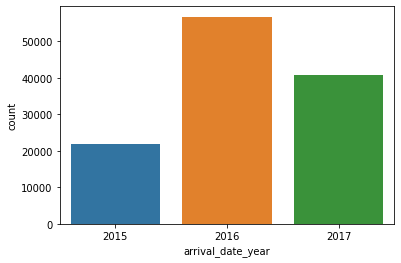

In [32]:
sns.countplot(x=df["arrival_date_year"],data=df)

### 47% bookings were done in 2016, 34% in 2017 and 18 percent in 2015.. We can see increasing tendency in bookings year wise

## 8: maximum costumers arrived in which month.

In [33]:
df["arrival_date_month"].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

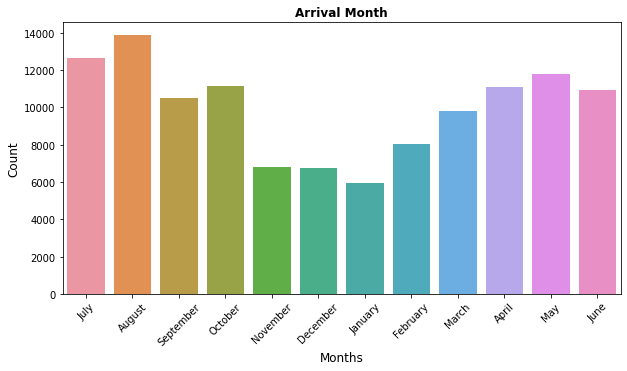

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='arrival_date_month', data=df)
plt.xticks(rotation=45)
plt.title('Arrival Month', weight='bold')
plt.xlabel('Months', fontsize=12)
plt.ylabel('Count', fontsize=12);

### The above graph is showing the number of bookings for each month. According to that, August is the busiest month and January is the most unoccupied month. It is half as busy as August.

## 9: looking into tha type of deposite 

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

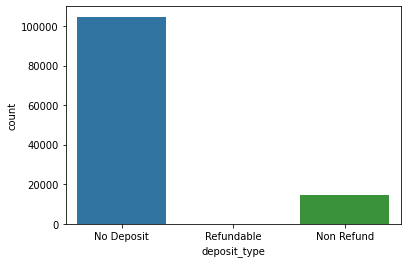

In [35]:
sns.countplot(x=df["deposit_type"],data=df)

### Majority of the booking does not require deposit. That could explain why cancellation rate was actually 50% of non-cancellation rate.

<AxesSubplot:>

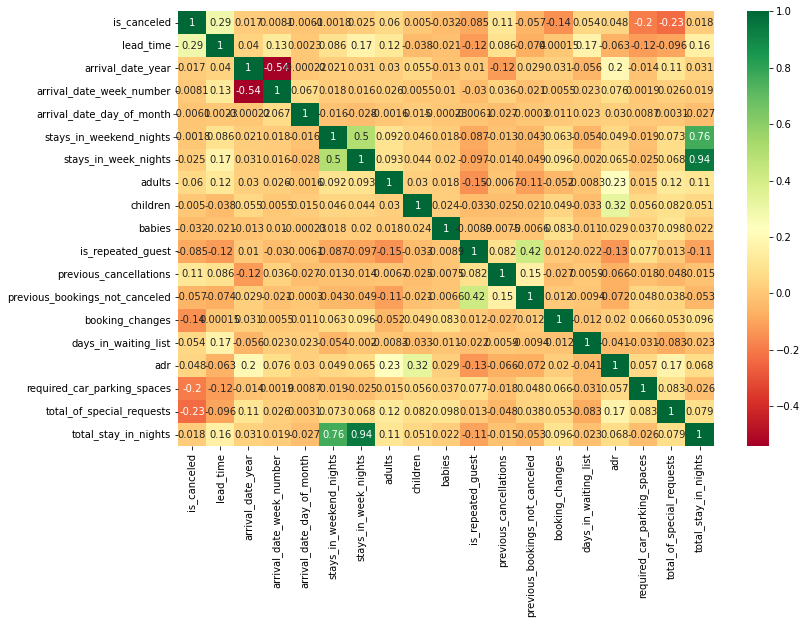

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

  ## 10: How many Bookings were Cancelled at the Hotel

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

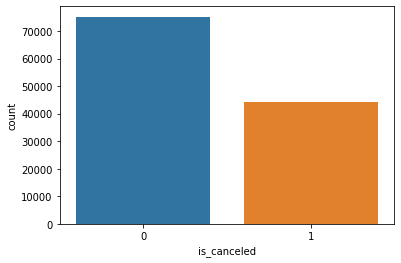

In [37]:
sns.countplot(x=df["is_canceled"],data=df)

In [38]:
df['is_canceled'].value_counts(normalize = True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

## 11: Which hotel have more cancellations?


<AxesSubplot:xlabel='hotel', ylabel='is_canceled'>

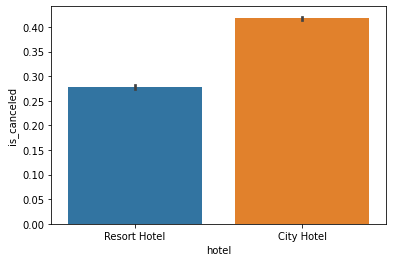

In [39]:
sns.barplot(data=df,x="hotel",y="is_canceled")

<AxesSubplot:xlabel='reservation_status', ylabel='count'>

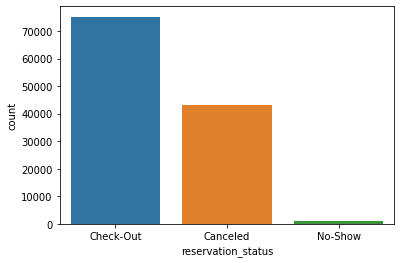

In [40]:
sns.countplot(x=df["reservation_status"],data=df)

<AxesSubplot:xlabel='meal', ylabel='count'>

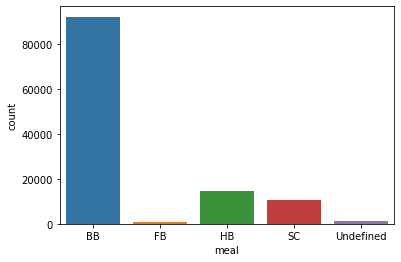

In [41]:
sns.countplot(x=df["meal"],data=df)

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

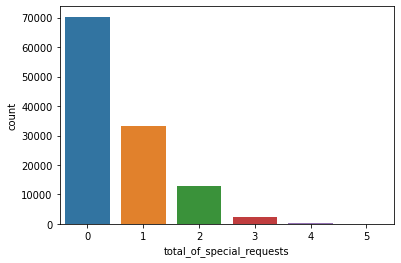

In [42]:
sns.countplot(x=df["total_of_special_requests"],data=df)

## Canceleation rate in each hotel 

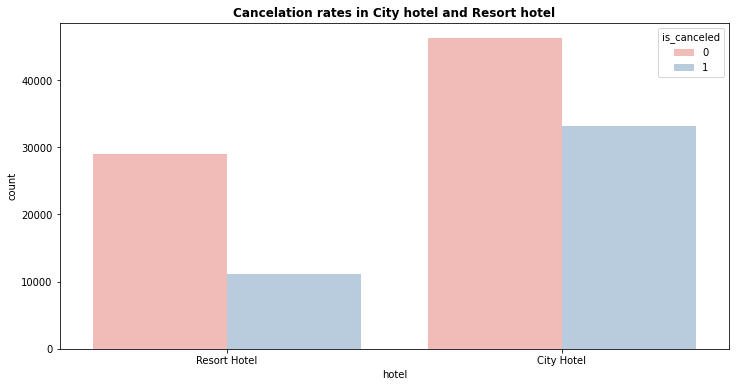

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x="hotel",hue="is_canceled", data=df,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold",size=12)
plt.show()

### Most bookings were in city hotel
### Cancelations in Resort hotel is less compared to city hotel


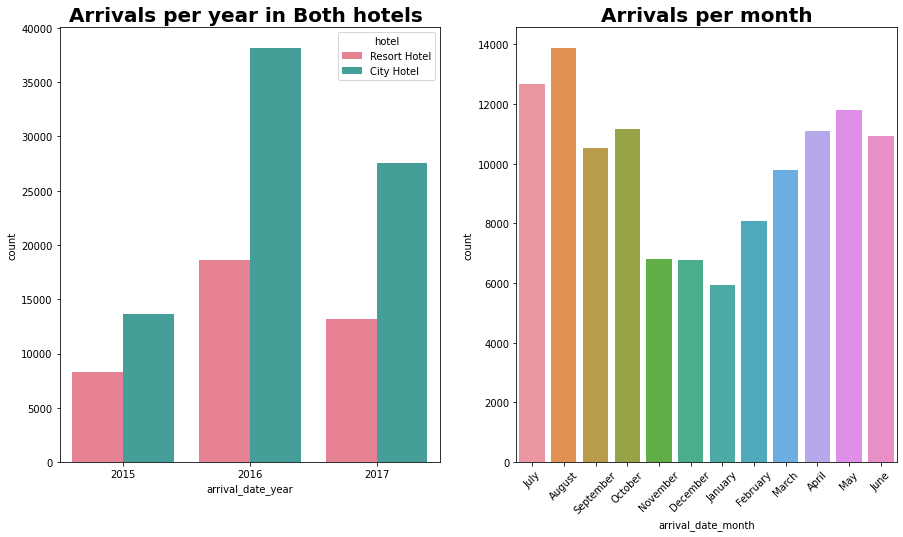

In [44]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x="arrival_date_year",hue="hotel", data=df,palette='husl')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data =df, x ="arrival_date_month")
plt.xticks(rotation=45)
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.show()


### We can see most of the bookings were in the year 2016 and bookings were doine in City hotel
### Most bookings were done in the month of May,June, July, August

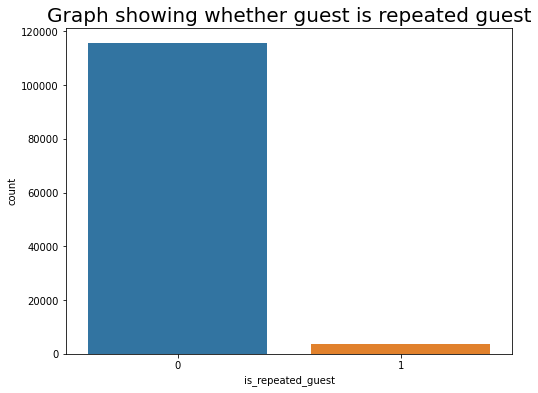

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = "is_repeated_guest")
plt.title("Graph showing whether guest is repeated guest", fontsize = 20)
plt.show()

### Low number of repeated guests.
### A need to target repeated guests since they have booked before. 

### adr :- average daily rate with arivel months,

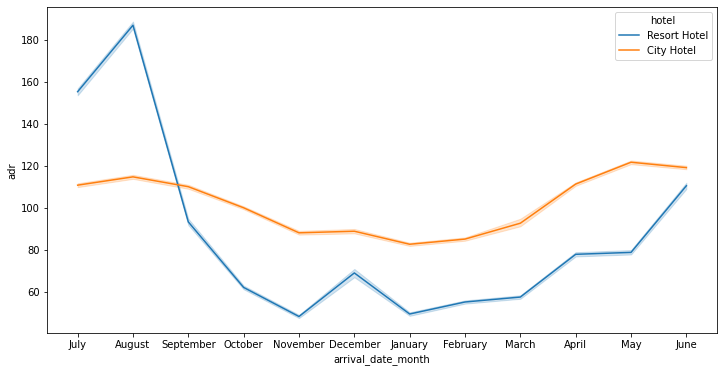

In [46]:
plt.figure(figsize=(12,6))
sns.lineplot(x="arrival_date_month", y="adr", hue="hotel", data=df);


### For Resort Hotel, ADR is more expensive during July, August & September and for City Hotel, ADR is slightly more during March, April & May.

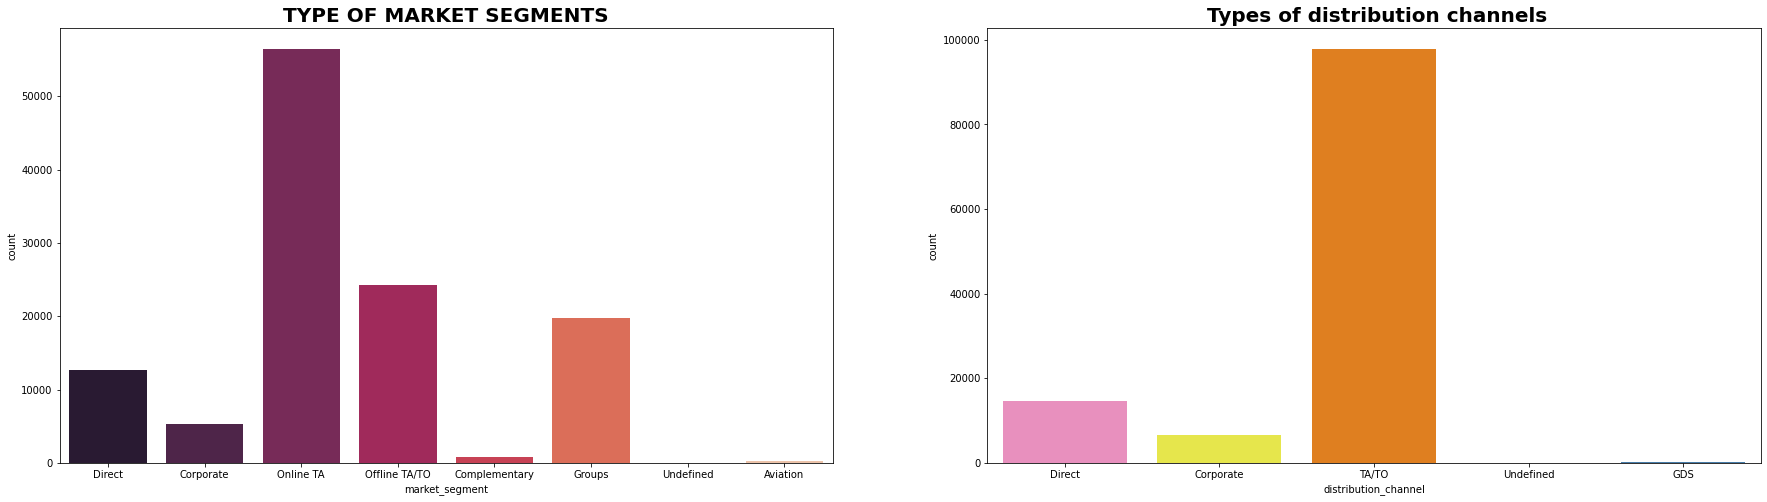

In [47]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x="market_segment", data=df, palette='rocket')
plt.title("TYPE OF MARKET SEGMENTS",fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x ="distribution_channel",palette="Set1_r")
plt.title(" Types of distribution channels",fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)
plt.show()

####  Majority DIstribution channels and Market segment were Travel agencies wither offline/online. So better focus more on this

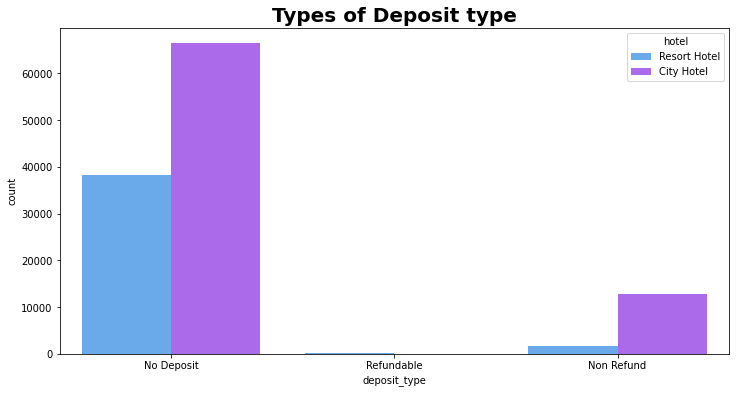

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(data =df, x = "deposit_type",hue="hotel", palette="cool")
plt.title("Types of Deposit type",fontweight="bold", size=20)
plt.show()

#### There was no deposit for City hotel where as Resorts had some deposits. No deposit may lead to cancel the bookings

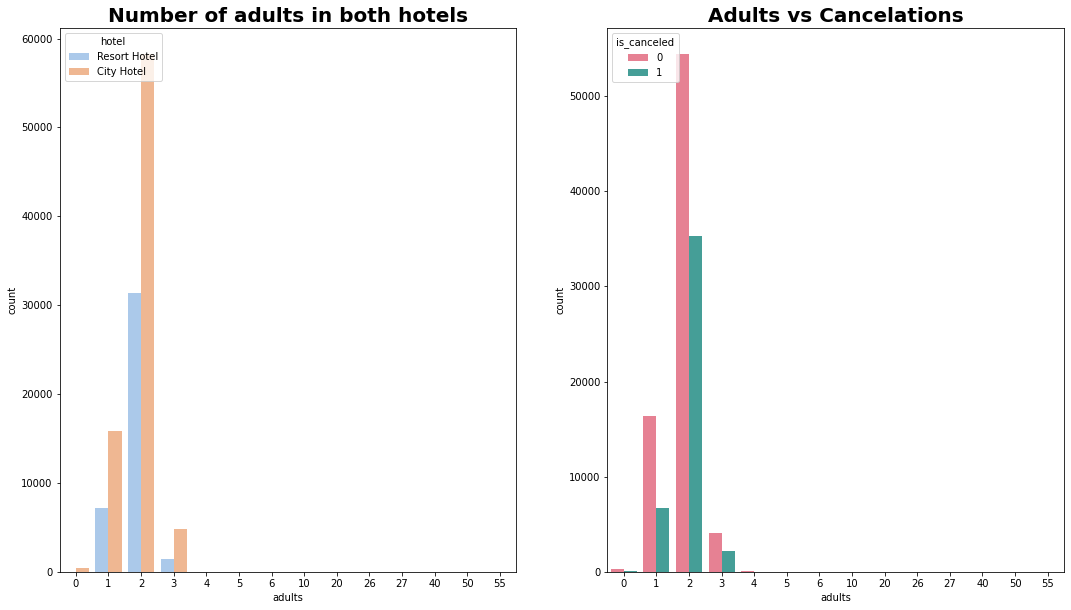

In [49]:
plt.figure(figsize=(18,10))
plt.subplot(1, 2, 1)
sns.countplot(x="adults",hue="hotel", data=df, palette="pastel")
plt.title("Number of adults in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x = "adults", hue="is_canceled", palette="husl")
plt.title("Adults vs Cancelations",fontweight="bold", size=20)
plt.show()    #subplots_adjust(right=1.7)

### Adults who were 2 in number are more and preferred city hotel rather than resort hotel, infact more than half the visitors even canceled the bookings

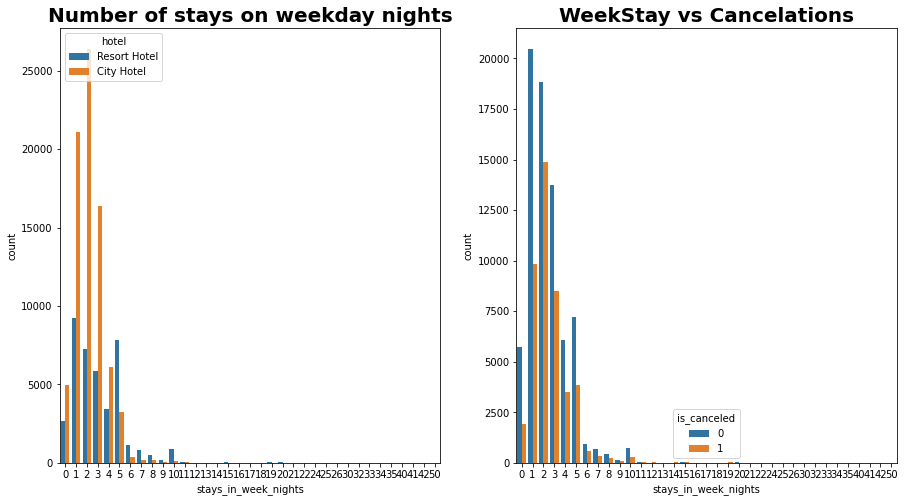

In [50]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x="stays_in_week_nights",hue="hotel", data=df)
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = "stays_in_week_nights",hue="is_canceled")
plt.title("WeekStay vs Cancelations",fontweight="bold", size=20)
plt.show()    

### Weekday night stays were more in City Hotel
### Less cancelations were observed

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


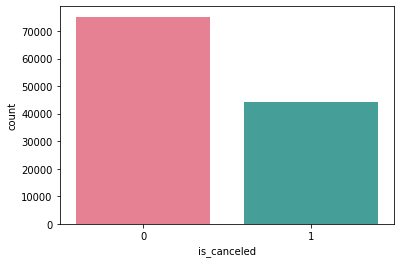

In [51]:
canceled_data = df["is_canceled"]
sns.countplot(canceled_data, palette='husl')
plt.show()

### Majority of bookings were not canceled, still some half of the bookings were canceled

<AxesSubplot:ylabel='is_canceled'>

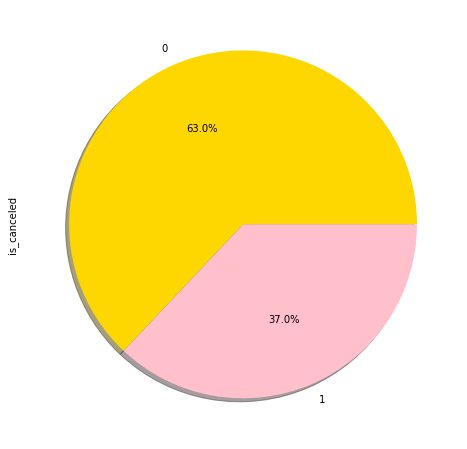

In [52]:
plt.figure(figsize=(15, 8))
cols = ['gold', 'pink']
df['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

### According to the pie chart, 63% of bookings were not canceled and 37% of the bookings were canceled at the Hotel.

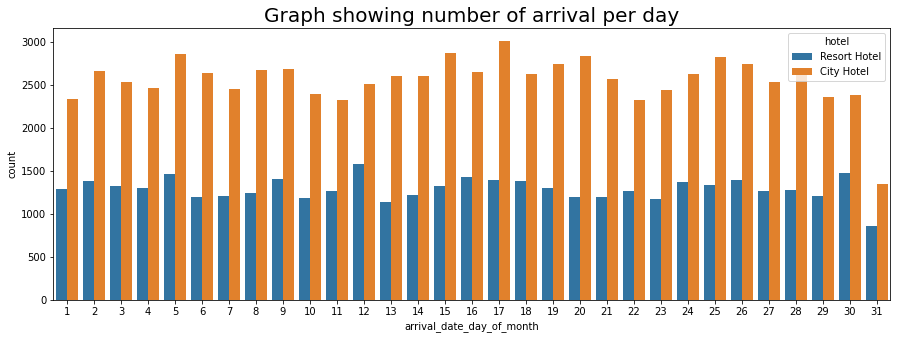

In [53]:
plt.figure(figsize=(15,5))

sns.countplot(data = df, x = 'arrival_date_day_of_month', hue = 'hotel')
plt.title('Graph showing number of arrival per day', fontsize = 20);

### I can see that 2016 seems to be the year where hotel booking is at its highest. We also see an increasing trend in booking around the middle of the year, with August being the highest. Summer ends around August, followed straight by autumn. It seems that summer period is a peak period for hotel booking.

Text(0.5, 1.0, 'Number of stays on weekend nights')

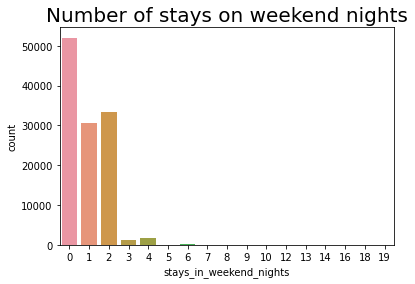

In [54]:
sns.countplot(data = df, x = 'stays_in_weekend_nights')
plt.title('Number of stays on weekend nights', fontsize = 20)

Text(0.5, 1.0, 'Number of stays on weekday night')

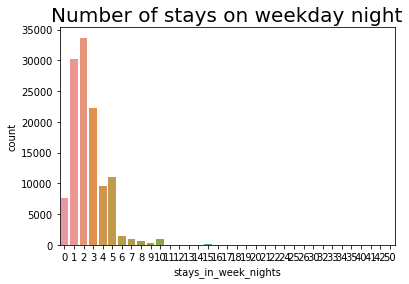

In [55]:
sns.countplot(data = df, x = 'stays_in_week_nights' )
plt.title('Number of stays on weekday night' , fontsize = 20)

### It seems that majority of the stays are over the weekday's night. Hence, it seems that whatever we saw for the chart on day of the month was random.

Text(0.5, 1.0, 'Number of children')

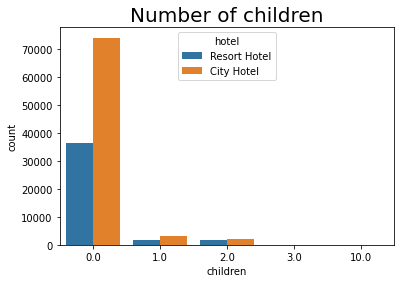

In [56]:
sns.countplot(data = df, x = 'children', hue = 'hotel')
plt.title("Number of children", fontsize = 20)

Text(0.5, 1.0, 'Number of babies')

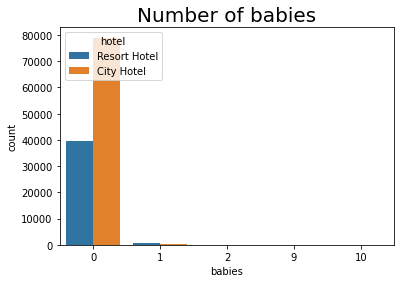

In [57]:
sns.countplot(data = df, x = 'babies', hue = 'hotel')
plt.title("Number of babies", fontsize = 20)

 ### itm seems that majority of the visitors travel in pair. Thos that travel with children or babies have no specific preference for the type of hotel. We do see that those bringing babies along prefer resort hotels.

## looking into market segments and distribution channel

Text(0.5, 1.0, 'Types of market segment')

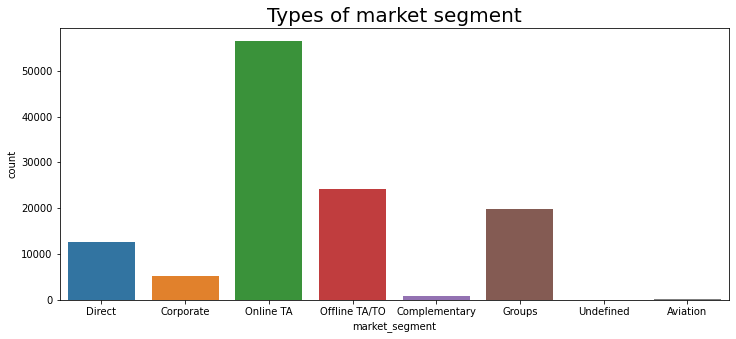

In [58]:
plt.figure(figsize=(12,5))
sns.countplot(data =df, x = 'market_segment')
plt.title('Types of market segment', fontsize = 20)

### Majority of the distribution channels and market segments involve travel agencies (online or offline).
 ### We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.

<AxesSubplot:>

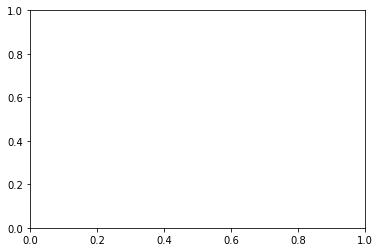

In [59]:
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']) 
actual_guests = df.loc[df["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')

## Summary
### 1: Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.
### 2: We also realise that the high rate of cancellations can be due high no deposit policies.
### 3: We should also target months between May to Aug. Those are peak months due to the summer period.
### 4: majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.
### 5:  Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests